In [1]:
import json
import numpy as np
import pandas as pd

with open('/content/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [2]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [3]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [5]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  303


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


In [7]:
print(X.shape)  # Ensure X has the expected shape, (num_samples, sequence_length)


(232, 18)


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

number of unique words =  303
X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 18, 100)             │          30,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,824 (374.31 KB)

 Trainable params: 95,824 (374.31 KB)

 Non-trainable params: 0 (0.00 B)

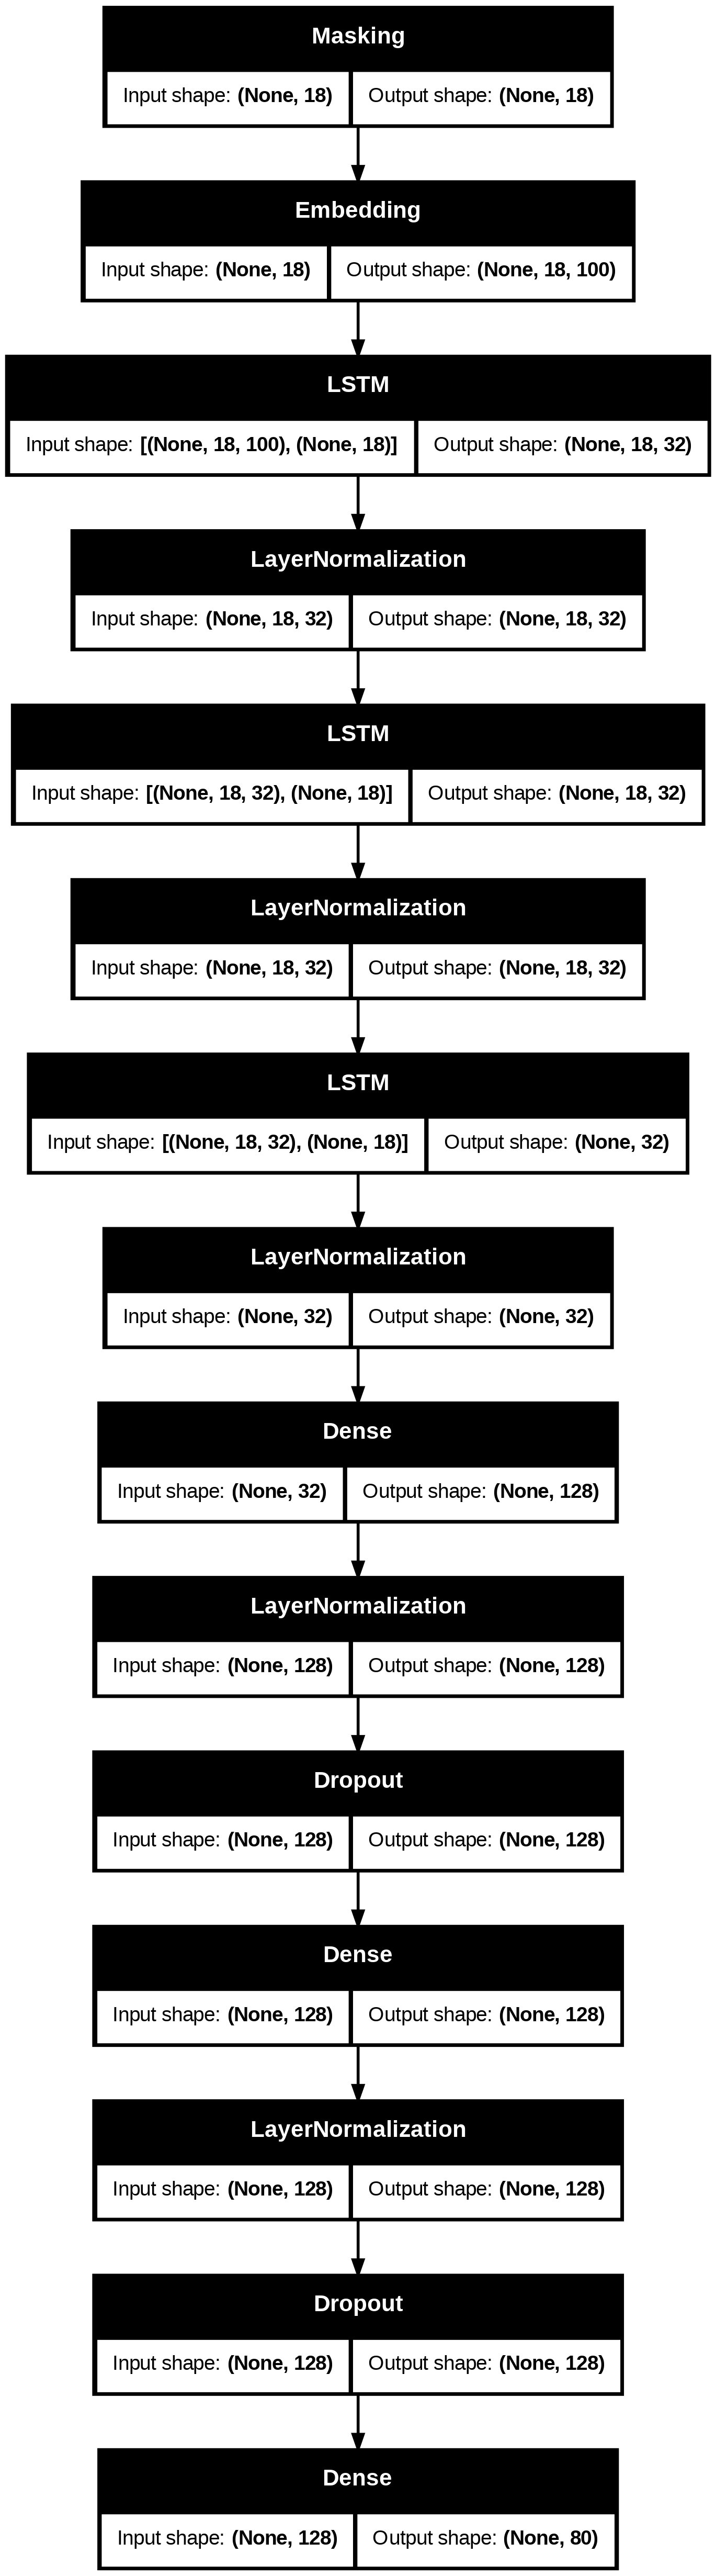

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming ptrn2seq and vacab_size are defined in your code
X = pad_sequences(ptrn2seq, padding='post')  # Already in your code

from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout, Masking

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Masking(mask_value=0))  # Mask the padding values
model.add(Embedding(input_dim=vacab_size + 1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(LSTM(32, unroll=True))  # Disable cuDNN by unrolling
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


# Model summary
model.summary()

# Plot the model
plot_model(model, show_shapes=True)


In [10]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.0229 - loss: 4.9944
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1050 - loss: 3.7627
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2448 - loss: 2.9971
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4275 - loss: 2.3965
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5478 - loss: 1.9804
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6091 - loss: 1.6917
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7032 - loss: 1.4985
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7558 - loss: 1.1945
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8255 - loss: 0.9636
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8789 - loss: 0.8616
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8535 - loss: 0.7457
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy

In [11]:
import re
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming tokenizer, model, X, lbl_enc, and df are defined globally in your code

def generate_answer(pattern):
    text = []

    # Clean and tokenize the input pattern
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower().strip()  # Ensure it's lowercased and stripped of extra spaces
    text.append(txt)  # Add to the list of texts to be processed


    # Convert the text to token sequences
    try:
        x_test = tokenizer.texts_to_sequences(text)
    except Exception as e:
        print(f"Error in text processing: {e}")
        return "Sorry, I couldn't understand that."

    # Ensure x_test is a list of lists before passing to pad_sequences
    if not isinstance(x_test, list) or not all(isinstance(i, list) for i in x_test):
        return "Sorry, I couldn't process your input."

    # Padding the sequence to match model input size
    x_test = pad_sequences(x_test, padding='post', maxlen=X.shape[1])

    # Predicting the response category
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()

    # Getting the tag and the corresponding response
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    # Return a random response for the identified tag
    return random.choice(responses)

def chat():
    print("Chatbot: Hello! Type 'quit' to exit.")
    conversation_history = ["Bot: Hello! How can I assist you today?"]
    print(conversation_history[0])

    while True:
        try:
            user_input = input("\nYou: ")
            if user_input.lower() == 'quit':
                print("Bot: Goodbye! Take care!")
                break

            # Add user input to the conversation history
            conversation_history.append(f"User: {user_input}")

            # Generate a bot response based on the user's input
            response = generate_answer(user_input)  # Pass the user input only
            print(f"Bot: {response}")

            # Add bot response to conversation history for context in future interactions
            conversation_history.append(f"Bot: {response}")

        except Exception as e:
            print(f"Error during chat: {str(e)}")
            print("Bot: Sorry, something went wrong.")

# Start the chat
chat()


Chatbot: Hello! Type 'quit' to exit.
Bot: Hello! How can I assist you today?

You: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Bot: Hi there. What brings you here today?

You: i feel depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Bot: Talk to me. Tell me more. It helps if you open up yourself to someone else.

You: thank you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Bot: You're most welcome!

You: quit
Bot: Goodbye! Take care!


In [12]:
# import os
# import json

# # Create the directory if it doesn't exist
# if not os.path.exists('my_rnn_model'):
#     os.makedirs('my_rnn_model')

# # Save the trained RNN model in the directory
# model.save('my_rnn_model/my_model.keras')

# # Save the tokenizer in the same directory
# tokenizer_json = tokenizer.to_json()
# with open('my_rnn_model/tokenizer.json', 'w') as f:
#     f.write(tokenizer_json)

# # Zip the model directory and download it
# from google.colab import files

# !zip -r my_rnn_model.zip my_rnn_model
# files.download('my_rnn_model.zip')



In [13]:
# !pip install azureml-sdk


In [14]:
# import json
# import numpy as np
# import tensorflow as tf
# from azureml.core.model import Model
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import random  # Ensure you import random if you're using it for responses

# # Initialize the model and tokenizer
# def init():
#     global model
#     global tokenizer

#     # Load the model
#     model_path = Model.get_model_path('my_rnn_model')  # Change to your model name
#     model = tf.keras.models.load_model(model_path)

#     # Load the tokenizer
#     with open(Model.get_model_path('tokenizer.json'), 'r') as f:
#         tokenizer_json = f.read()
#         tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer_json)

# # Handle prediction requests
# def run(data):
#     try:
#         data = json.loads(data)  # Parse the input JSON data
#         input_text = data['text']  # Extract the text input from the data

#         # Tokenizing and padding the input text
#         input_seq = tokenizer.texts_to_sequences([input_text])
#         input_seq = pad_sequences(input_seq, padding='post', maxlen=model.input_shape[1])

#         # Predicting the response category
#         predictions = model.predict(input_seq)
#         y_pred = np.argmax(predictions, axis=1)

#         # Assuming you have a LabelEncoder (lbl_enc) and DataFrame (df) accessible
#         tag = lbl_enc.inverse_transform(y_pred)[0]  # Transform predicted class back to label
#         responses = df[df['tag'] == tag]['responses'].values[0]  # Get responses for the tag

#         return json.dumps({"response": random.choice(responses)})  # Randomly select a response

#     except Exception as e:
#         return json.dumps({"error": str(e)})  # Return the error as JSON


In [15]:
# from azureml.core import Workspace

# # Provide the path to the uploaded config.json file
# ws = Workspace.from_config(path="./config.json")

# print("Workspace:", ws.name)


In [16]:
# from azureml.core import Workspace, Environment, Model
# from azureml.core.webservice import AciWebservice, Webservice
# from azureml.core.model import InferenceConfig

# # Connect to the Azure ML workspace
# ws = Workspace.from_config()

# # Register the model
# from azureml.core import Model

# # Register the model
# model = Model.register(workspace=ws,
#                        model_path='/content/my_model.keras',  # Ensure this is the correct path
#                        model_name='my_rnn_model')


# # Define the environment
# env = Environment.from_conda_specification(name="chatbot-env", file_path="environment.yml")

# # Set up the inference configuration
# inference_config = InferenceConfig(entry_script="score.py", environment=env)

# # Deploy the model as a web service
# aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)
# service = Model.deploy(ws, "chatbot-service", [model], inference_config, aci_config)
# service.wait_for_deployment(show_output=True)

# # Output the scoring URI for testing
# print(f"Scoring URI: {service.scoring_uri}")


In [17]:
# print(service.state)



In [18]:
model.save('my_rnn_model/my_model.h5')